

# 项目：调查数据集TMDb电影数据

## 目录
<ul>
<li><a href="#intro">简介</a></li>
<li><a href="#wrangling">数据整理</a></li>
<li><a href="#eda">探索性数据分析</a></li>
<li><a href="#conclusions">结论</a></li>
</ul>

<a id='intro'></a>
## 简介



#数据集各字段的意思：

#•   id：标识号
#•   imdb_id：IMDB 标识号
#•   popularity：在 Movie Database 上的相对页面查看次数
#•   budget：预算（美元）
#•   revenue：收入（美元）
#•   original_title：电影名称
#•   cast：演员列表，按 | 分隔
#•   homepage：电影首页的 URL
#•   director：导演列表，按 | 分隔
#•   tagline：电影的标语
#•   keywords：与电影相关的关键字，按 | 分隔
#•   overview：剧情摘要
#•   runtime：电影时长
#•   genres：风格列表，按 | 分隔
#•   production_companies：制作公司列表，按 | 分隔
#•   release_date：首次上映日期
#•   vote_count：投票数
#•   vote_average：平均投票数
#•   release_year：发行年份
#•   budget_adj：根据通货膨胀调整的预算（2010 年，美元）
#•   revenue_adj：根据通货膨胀调整的收入（2010 年，美元）


In [1]:
# 用这个框对你计划使用的所有数据包进行设置
#   导入语句。
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns

# 务必包含一个‘magic word’，以便将你的视图
#   与 notebook 保持一致。关于更多信息，请访问该网页：
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


In [2]:
df = pd.read_csv('tmdb_movies.csv')

<a id='wrangling'></a>
## 数据整理


### 常规属性

In [3]:
# 加载数据并打印几行。进行这几项操作，来检查数据
#   类型，以及是否有缺失数据或错误数据的情况。

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

### 数据清理（清理 homepage列，清理重复数据）

因为数据集中的列“homepage”包含大量缺失值，并且对于接下来要研究的问题没有影响，所以删除该列。

In [4]:
df.drop(['homepage'],axis=1,inplace=True)
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [5]:
df.shape

(10866, 20)

In [6]:
df.duplicated().sum()

1

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.duplicated().sum()

0

<a id='eda'></a>
## 探索性数据分析

### 研究问题 1 每年最受欢迎的电影类别是哪些？

因为数据集中“genres”列中包含多个数据，由“|”分隔，需要拆分开来。

In [9]:
#从df中选出探究问题需要的数据，组成一个新的列表
columns1 = ['genres','release_year','vote_average']

In [10]:
df1 = df[columns1]

In [11]:
df1.head()

,genres,release_year,vote_average
0,Action|Adventure|Science Fiction|Thriller,2015,6.5
1,Action|Adventure|Science Fiction|Thriller,2015,7.1
2,Adventure|Science Fiction|Thriller,2015,6.3
3,Action|Adventure|Science Fiction|Fantasy,2015,7.5
4,Action|Crime|Thriller,2015,7.3


In [12]:
#把genres中用“|”分隔的词语拆分开，重组成一个新的genres列，匹配相应的release_year和vote_average
df1_genres = df1.drop('genres', axis=1).join(df1['genres'].str.split('|', expand=True) \
                                     .stack().reset_index(level=1, drop=True).rename('genres'))

In [13]:
df1_genres

,release_year,vote_average,genres
0,2015,6.5,Action
0,2015,6.5,Adventure
0,2015,6.5,Science Fiction
0,2015,6.5,Thriller
1,2015,7.1,Action
1,2015,7.1,Adventure
1,2015,7.1,Science Fiction
1,2015,7.1,Thriller
2,2015,6.3,Adventure
2,2015,6.3,Science Fiction


In [14]:
df1_genres.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26978 entries, 0 to 10865
Data columns (total 3 columns):
release_year    26978 non-null int64
vote_average    26978 non-null float64
genres          26955 non-null object
dtypes: float64(1), int64(1), object(1)
memory usage: 843.1+ KB


In [15]:
#删除空值
df1_genres.dropna(inplace=True)

In [16]:
df1_genres.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26955 entries, 0 to 10865
Data columns (total 3 columns):
release_year    26955 non-null int64
vote_average    26955 non-null float64
genres          26955 non-null object
dtypes: float64(1), int64(1), object(1)
memory usage: 842.3+ KB


选取平均评分等于或高于7.5分的数据为最受欢迎的定义，筛选数据

In [17]:
#提取出评分高于7.5的数据
df1_genres = df1_genres.query('vote_average>=7.5')

In [18]:
df1_genres.shape

(1005, 3)

In [19]:
df1_genres.head(20)

,release_year,vote_average,genres
3,2015,7.5,Action
3,2015,7.5,Adventure
3,2015,7.5,Science Fiction
3,2015,7.5,Fantasy
7,2015,7.6,Drama
7,2015,7.6,Adventure
7,2015,7.6,Science Fiction
9,2015,8.0,Comedy
9,2015,8.0,Animation
9,2015,8.0,Family


In [20]:
#将电影风格按年份分类
target = df1_genres.groupby('release_year')['genres'].value_counts().unstack()

In [21]:
target.head(20)

genres,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
release_year,,,,,,,,,,,,,,,,,,,,
1960,NaN,NaN,NaN,1.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN
1961,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962,NaN,1.0,NaN,NaN,1.0,NaN,2.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
1963,NaN,1.0,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN,2.0,1.0,NaN
1964,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
1965,NaN,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1966,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1967,NaN,NaN,NaN,1.0,2.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN
1968,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN


In [22]:
#得出结果
year_most_genre = pd.DataFrame({'genres':target.idxmax(axis=1), 'count':target.max(axis=1)})

In [23]:
year_most_genre

,count,genres
release_year,,
1960,2.0,Drama
1961,1.0,Comedy
1962,2.0,Drama
1963,2.0,Thriller
1964,1.0,Comedy
1965,1.0,Animation
1966,1.0,Animation
1967,3.0,Drama
1968,1.0,Adventure


由得出的结果可以看出每年最受欢迎的电影类别。

### 研究问题 2（票房高的电影有哪些特点？）

探究票房高的电影风格是哪些？采用之前拆分好的split_genres数据，添加revenue列表

In [24]:
columns2 = ['genres','revenue']

In [25]:
df2 = df[columns2]

In [26]:
df2.head()

,genres,revenue
0,Action|Adventure|Science Fiction|Thriller,1513528810
1,Action|Adventure|Science Fiction|Thriller,378436354
2,Adventure|Science Fiction|Thriller,295238201
3,Action|Adventure|Science Fiction|Fantasy,2068178225
4,Action|Crime|Thriller,1506249360


In [27]:
df2_genres = df2.drop('genres', axis=1).join(df['genres'].str.split('|', expand=True) \
                                     .stack().reset_index(level=1, drop=True).rename('genres'))

In [28]:
df2_genres.head(20)

,revenue,genres
0,1513528810,Action
0,1513528810,Adventure
0,1513528810,Science Fiction
0,1513528810,Thriller
1,378436354,Action
1,378436354,Adventure
1,378436354,Science Fiction
1,378436354,Thriller
2,295238201,Adventure
2,295238201,Science Fiction


In [29]:
df2_genres.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26978 entries, 0 to 10865
Data columns (total 2 columns):
revenue    26978 non-null int64
genres     26955 non-null object
dtypes: int64(1), object(1)
memory usage: 632.3+ KB


In [30]:
df2_genres.dropna(inplace=True)

In [31]:
df2_genres.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26955 entries, 0 to 10865
Data columns (total 2 columns):
revenue    26955 non-null int64
genres     26955 non-null object
dtypes: int64(1), object(1)
memory usage: 631.8+ KB


将表格按照revenue排序，由大到小。

In [32]:
high_revenue_genres = df2_genres.sort_values(by="revenue" , ascending=False) 

选取前100名收入最高的电影来分析风格。

In [33]:
high_revenue_genres = high_revenue_genres.head(100)

In [34]:
high_revenue_genres

,revenue,genres
1386,2781505847,Action
1386,2781505847,Adventure
1386,2781505847,Fantasy
1386,2781505847,Science Fiction
3,2068178225,Action
3,2068178225,Fantasy
3,2068178225,Adventure
3,2068178225,Science Fiction
5231,1845034188,Drama
5231,1845034188,Thriller


得到结果

Text(0.5,1,'The genres of high revenue')

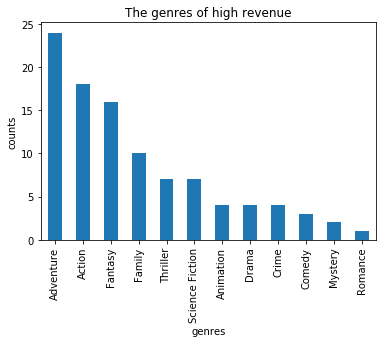

In [35]:
high_revenue_genres['genres'].value_counts().plot(kind = 'bar')
plt.xlabel('genres')
plt.ylabel('counts')
plt.title('The genres of high revenue')

由柱状图可以看出票房高的电影的风格，其中纪录片占比较高。

### 研究问题 3（评分高的电影是否会得到更高的收入？）

In [36]:
columns = ['revenue','vote_average']

In [37]:
high_revenue = df[columns]

In [38]:
high_revenue.head()

,revenue,vote_average
0,1513528810,6.5
1,378436354,7.1
2,295238201,6.3
3,2068178225,7.5
4,1506249360,7.3


In [39]:
#数据集中包含很多revenue为0的数据，去除为0的数据再进行分析
high_revenue = high_revenue.query('revenue>0')

In [40]:
high_revenue.shape

(4849, 2)

Text(0.5,1,'high score and high revenue')

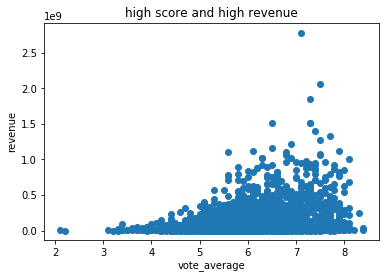

In [41]:
plt.scatter(high_revenue['vote_average'],high_revenue['revenue'])
plt.xlabel('vote_average')
plt.ylabel('revenue')
plt.title('high score and high revenue')

由散点图可以看出，收入和评分数据之间有呈现正相关的趋势，在7-8分之间的点最密集，最高收入也出现在这个范围内。

<a id='conclusions'></a>
## 结论

在探究问题的时候，存在一定的限制，所以所得结论会存在一定的偏差和不确定性。
###数据清洗的过程中，因为genres列拆分之后，部分列存在较多缺失值，所以对探究结果的准确性会有一定的影响。

1、由第一个研究问题得出的结果可以看出每年最受欢迎的电影类别是什么，例如2015年评分较高的电影类型较多数是Documentary，2014年评分较高的电影类型较多数是drama。

2、由研究结果可以看出，第二个研究问题，票房高的电影普遍类型是什么，其中较为突出的类型有adventure，action，fantasty

3、第三个问题得分高的电影是否得到更高的票房收入，从散点图看出，收入和评分呈现正相关的关系。

In [42]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

255